# Preprocessing images and video
This notebook demonstrates the results of preprocessing for various devices on using images and video from the [CIRS 040GSE](https://www.cirsinc.com/products/ultrasound/zerdine-hydrogel/multi-purpose-multi-tisse-ultrasound-phantom/) phantom.

## Butterfly
Below shows results for the Butterfly iQ (note, there's a new Butterfly iQ+).  Note, the orientation mark is still visible in the output image as it is too large to median filter.  Possible solutions are a more advanced in-filling procedure than the median filter used or cropping the image.

orig_img: 
	type: <class 'itk.itkImagePython.itkImageRGBUC2'>, 
	spacing: itkVectorD2 ([1, 1]), 
	size: itkSize2 ([1928, 1080]), 
	min/max RGB value: 0, 255
new_img: 
	type: <class 'itk.itkImagePython.itkImageF2'>, 
	spacing: itkVectorD2 ([0.047619, 0.047619]), 
	size: itkSize2 ([693, 994]), 
	min/max value: 0.0, 1.0, 
	meta: {'spacing': array([0.04761905, 0.04761905]), 'crop': array([[  54, 1048],
       [ 614, 1307]])}


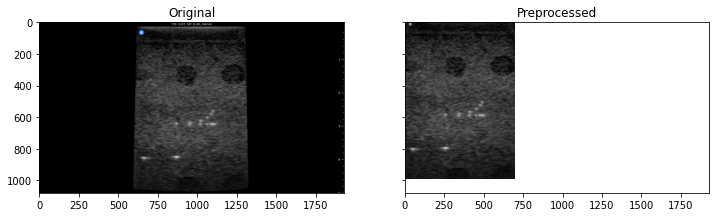

In [1]:
import itk
import matplotlib.pyplot as plt
import itkpocus.butterfly as butterfly
import numpy as np

fp = '../tests/data/butterfly_axial-lateral-resolution-2020.png'
orig_img = itk.imread(fp)
new_img, meta = butterfly.load_and_preprocess_image(fp)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
axs[0].imshow(orig_img) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')
print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

## Clarius

orig_img: 
	type: <class 'itk.itkImagePython.itkImageRGBUC2'>, 
	spacing: itkVectorD2 ([1, 1]), 
	size: itkSize2 ([1280, 960]), 
	min/max RGB value: 0, 247
new_img: 
	type: <class 'itk.itkImagePython.itkImageF2'>, 
	spacing: itkVectorD2 ([0.714286, 0.714286]), 
	size: itkSize2 ([592, 642]), 
	min/max value: 0.0, 0.9686274528503418, 
	meta: {'spacing': [0.7142857142857143, 0.7142857142857143], 'crop': array([[159, 800],
       [344, 935]], dtype=int64)}


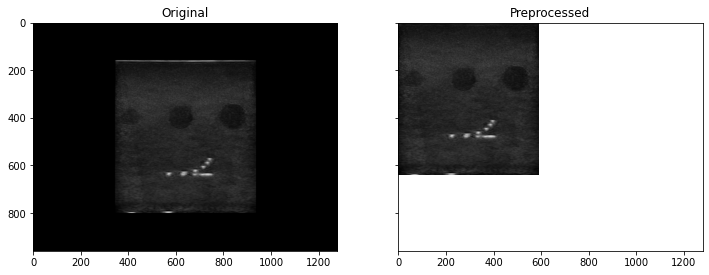

In [2]:
import itk
import matplotlib.pyplot as plt
import itkpocus.clarius as clarius
import numpy as np

fp = '../tests/data/clarius_axial-lateral-resolution-2020.png'
orig_img = itk.imread(fp)
new_img, meta = clarius.load_and_preprocess_image(fp)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
axs[0].imshow(orig_img) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')
print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

## Sonoque

Unknown encoding 'ISO_IR' - using default encoding instead


orig_img: 
	type: <class 'itk.itkImagePython.itkImageRGBUC3'>, 
	spacing: itkVectorD3 ([1, 1, 1]), 
	size: itkSize3 ([2083, 1455, 1]), 
	min/max RGB value: 0, 255
new_img: 
	type: <class 'itk.itkImagePython.itkImageD2'>, 
	spacing: itkVectorD2 ([0.00291, 0.00291]), 
	size: itkSize2 ([1293, 1311]), 
	min/max value: 0.0, 0.9607843137254902, 
	meta: {'spacing': (0.00291, 0.00291), 'crop': array([[  72, 1382],
       [ 395, 1687]], dtype=int64)}


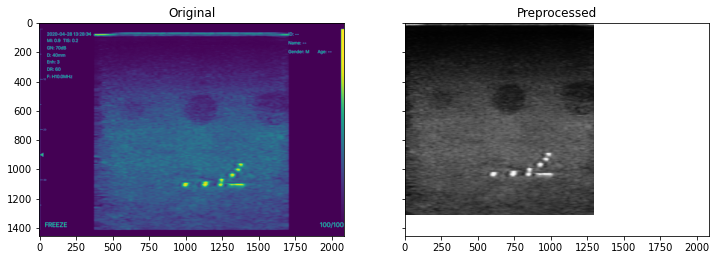

In [3]:
import itk
import matplotlib.pyplot as plt
import itkpocus.sonoque as sonoque
import numpy as np

fp = '../tests/data/sonoque_axial-lateral-resolution-2020.dcm'
orig_img = itk.imread(fp)
new_img, meta = sonoque.load_and_preprocess_image(fp)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
# sonoque saves as a single-image US series, so we have to remove extraneous 1-element dimensions
axs[0].imshow(itk.array_from_image(orig_img)[0,:,:,0]) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')
print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

## Interson
Coming Soon!

## Sonivate
Sonivate currently doesn't allow direct retrieval of ultrasound images from its device.  We recommend streaming the probe to Slicer and then saving from Slicer.

(1455, 2083),npimg.GetLargestPossibleRegion().GetSize()
crop=[[  72 1382]
 [ 395 1687]]
orig_img: 
	type: <class 'itk.itkImagePython.itkImageRGBUC3'>, 
	spacing: itkVectorD3 ([1, 1, 1]), 
	size: itkSize3 ([2083, 1455, 1]), 
	min/max RGB value: 0, 255
new_img: 
	type: <class 'itk.itkImagePython.itkImageUC2'>, 
	spacing: itkVectorD2 ([1, 1]), 
	size: itkSize2 ([1293, 1311]), 
	min/max value: 2, 244, 
	meta: 


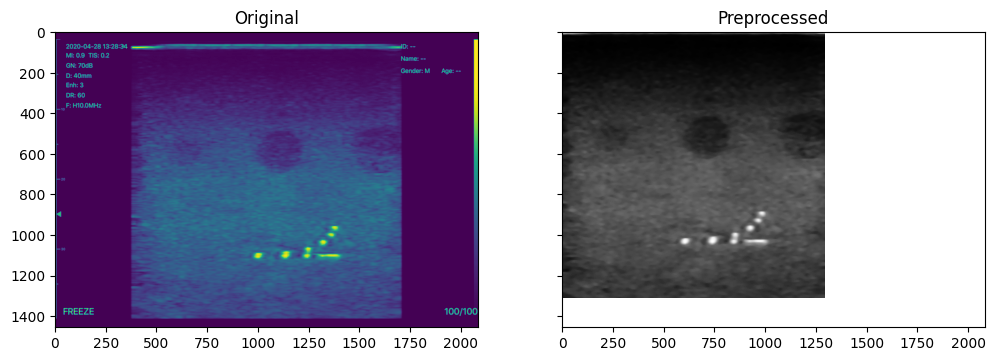

In [40]:
import itk
import matplotlib.pyplot as plt
import itkpocus.sonoque as sonoque
import itkpocus.util
import numpy as np

def sonoque_load_and_preprocess_image(origimg):
    npimg_rgb = itk.image_duplicator(orig_img[0,:,:,:])
    npimg = npimg_rgb[:,:,0]
    
    print(f"{npimg.shape},npimg.GetLargestPossibleRegion().GetSize()")
    crop = sonoque._find_crop(npimg)
    print(f"crop={crop}")
    c1=itkpocus.util.crop(npimg, crop)
    c3=itkpocus.util.crop(npimg_rgb, crop, rgb=True)
    npnorm, _ = sonoque._normalize(c1,c3)
    
    img = itk.image_from_array(npnorm)
    return img, ""

fp = '../tests/data/sonoque_axial-lateral-resolution-2020.dcm'
orig_img = itk.imread(fp)
clonedImage = itk.image_duplicator(orig_img[0,:,:,:])
new_img, meta = sonoque_load_and_preprocess_image(orig_img)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
# sonoque saves as a single-image US series, so we have to remove extraneous 1-element dimensions
axs[0].imshow(itk.array_from_image(orig_img)[0,:,:,0]) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')
print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

orig_img: 
	type: <class 'itk.itkImagePython.itkImageRGBUC2'>, 
	spacing: itkVectorD2 ([1, 1]), 
	size: itkSize2 ([720, 540]), 
	min/max RGB value: 0, 255
(540, 720),npimg.GetLargestPossibleRegion().GetSize()
stuff_cols(720,)=[False  True  True  True  True  True  True  True  True  True]
zerocol : (64, 1)
crop=[[ 95 448]
 [136 583]]
new_img: 
	type: <class 'itk.itkImagePython.itkImageUC2'>, 
	spacing: itkVectorD2 ([1, 1]), 
	size: itkSize2 ([448, 354]), 
	min/max value: 0, 242, 
	meta: 


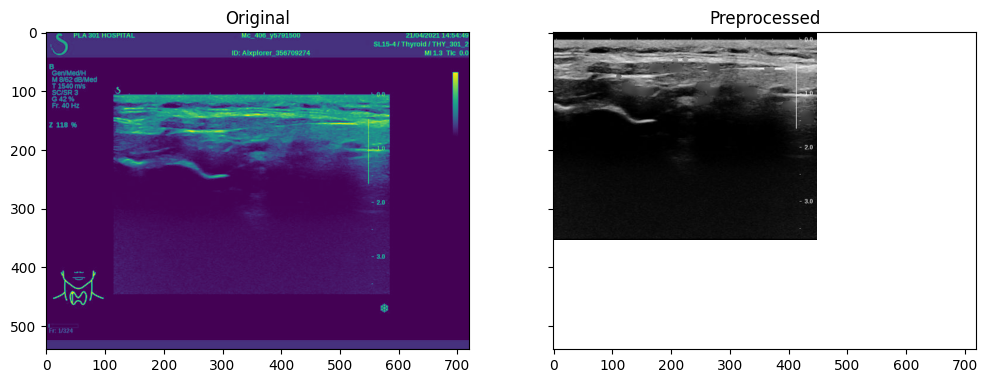

In [55]:
import itk
import matplotlib.pyplot as plt
import itkpocus.sonoque as sonoque
import itkpocus.util
import numpy as np

def sonoque_find_crop(npimg):
    '''
    Calculates a crop that contains only the ultrasound portion of the image (overlay text may still be on portion).
    
    Parameters
    ----------
    npimg : ndarray
        single channel 0 to 255 (e.g. pydicom's pixel_array or a video frame)
    
    Returns
    -------
    crop : ndarray
        (2x2 ndarray) [[topbound, bottombound], [leftbound, rightbound]]
    '''
    nonempty_threshold = 0.1 # percentage of nonzero pixels
    background_threshold = 30 # pixel intensity
    stuff_cols = np.sum(npimg > background_threshold, axis=0) > nonempty_threshold * npimg.shape[0]
    print(f"stuff_cols{stuff_cols.shape}={stuff_cols[:10]}")
    
    height_min_crop = 0.05
    width_min_crop = 0.19 # currently unused
    
    
    midcol = npimg.shape[1]/2.0 # not worried if non-integer
    zerocol = np.argwhere(stuff_cols == 0)
    print(f"zerocol : {zerocol.shape}")
    if zerocol.shape[0]<1:
        return np.array([[0, -1], [0, -1]])
    leftbound = np.max( (np.max(zerocol[zerocol < midcol])+1, int(npimg.shape[1] * width_min_crop) ))
    rightbound = np.min( (np.min(zerocol[midcol < zerocol])-1, int(npimg.shape[1] * (1 - width_min_crop) )))
    
    midrow = npimg.shape[0]/2.0
    rowsum = np.sum(npimg[:,leftbound:rightbound+1], axis=1)
    zerorow = np.argwhere(rowsum == 0)
    topbound = np.max( (np.max(zerorow[zerorow < midrow]), int(height_min_crop * npimg.shape[0])) )
    bottombound = np.min( (np.min(zerorow[midrow < zerorow]), int(npimg.shape[0] * (1 - height_min_crop))) )
    
    return np.array([[topbound, bottombound], [leftbound, rightbound]])

def sonoque_load_and_preprocess_image(origimg):
    npimg_rgb = itk.image_duplicator(orig_img[:,:,:])
    npimg = npimg_rgb[:,:,0]
    print(f"{npimg.shape},npimg.GetLargestPossibleRegion().GetSize()")
    crop = sonoque_find_crop(npimg)
    print(f"crop={crop}")
    c1=itkpocus.util.crop(npimg, crop)
    c3=itkpocus.util.crop(npimg_rgb, crop, rgb=True)
    npnorm, _ = sonoque._normalize(c1,c3)
    
    img = itk.image_from_array(npnorm)
    return img, ""

fp = '/media/eton/hdd931g/42-workspace4debian/10-ExtSrcs/ITKPOCUS/itkpocus/tests/data/83CasesFirstImg/thyroidNodules_axp-043_frm-0001.png'
orig_img = itk.imread(fp)

print('orig_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max RGB value: {}, {}'.format(
    str(type(orig_img)),
    str(orig_img.GetSpacing()),
    str(orig_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(orig_img)), np.max(itk.array_from_image(orig_img)))
)

new_img, meta = sonoque_load_and_preprocess_image(orig_img)

fig, axs = plt.subplots(1,2, sharex=True, sharey=True, figsize=(12,10))

axs[1].imshow(new_img, cmap='gray')
axs[1].title.set_text('Preprocessed')
# sonoque saves as a single-image US series, so we have to remove extraneous 1-element dimensions
axs[0].imshow(itk.array_from_image(orig_img)[:,:,0]) # since this is the bigger image, have to plot it last for sharex/y to work
axs[0].title.set_text('Original')
#fig.axes.set_aspect('equal')


print('new_img: \n\ttype: {}, \n\tspacing: {}, \n\tsize: {}, \n\tmin/max value: {}, {}, \n\tmeta: {}'.format(
    str(type(new_img)),
    str(new_img.GetSpacing()),
    str(new_img.GetLargestPossibleRegion().GetSize()),
    np.min(itk.array_from_image(new_img)), np.max(itk.array_from_image(new_img)),
    str(meta))
)

type of itk-image:<class 'itk.itkImagePython.itkImageRGBUC3'>


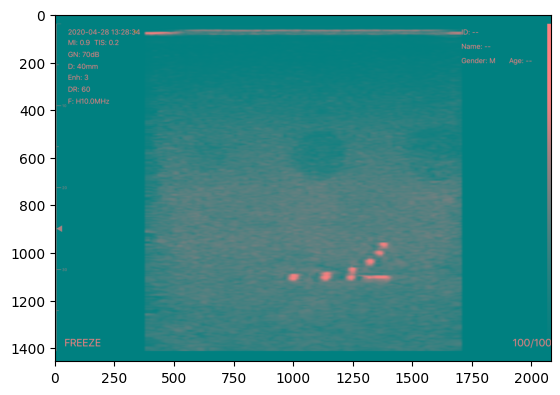

In [25]:
import copy
fp = '../tests/data/sonoque_axial-lateral-resolution-2020.dcm'
orig_img = itk.imread(fp)
print(f"type of itk-image:{type(orig_img)}")
clonedImage = itk.image_duplicator(orig_img[0,:,:,:]) #this work
#clonedImage = itk.image_duplicator(orig_img)


def deepcopyItkImg(original_image):
    # Determine the pixel type and dimensionality from the original image
    imginfo=itk.template(original_image)
    print(f"{type(imginfo)}, {type(imginfo[1])},{type(imginfo[1][0])}, {imginfo[1][0]}")
    pixel_type = imginfo[1][0]
    dimension = original_image.GetImageDimension()
    
    # Create a new image of the same type
    image_type = itk.Image[pixel_type, dimension]
    new_image = image_type.New()
    
    # Set the same region and allocate memory
    new_image.SetRegions(original_image.GetLargestPossibleRegion())
    new_image.Allocate()
    
    # Optionally, copy the data from the original image to the new image
    itk.imath.copy_image(original_image, new_image)

    return new_image

#clonedImage = deepcopyItkImg(orig_img)
plt.imshow(clonedImage)


In [8]:
import itk

Dimension = 2
PixelType = itk.UC

ImageType = itk.Image[PixelType, Dimension] ##itk::Image<PixelType, Dimension>;

randomImageSource = itk.RandomImageSource[ImageType].New()
randomImageSource.SetNumberOfWorkUnits(1)  # to produce non-random results

image = randomImageSource.GetOutput()

clonedImage = itk.image_duplicator(image)

In [3]:
import itk
import matplotlib.pyplot as plt
import itkpocus.sonoque as sonoque
import numpy as np

fp='/home/eton/42workspace.lnk/30-downloads/241209-dateBefroreMe/5_5_6.dcm'
orig_img = itk.imread(fp)
new_img, meta = sonoque.load_and_preprocess_image(fp)




KeyError: (0018,6011)

In [2]:
!pip install matplotlib


Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 22.1 MB/s eta 0:00:000:00:01
  Using cached https://pypi.tuna.tsinghua.edu.cn/packages/e7/05/c19819d5e3d95294a6f5947fb9b9629efb316b96de511b418c53d245aae6/cycler-0.12.1-py3-none-any.whl (8.3 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.4 MB/s eta 0:00:0031m103.3 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 5.5 MB/s eta 0:00:00118.5 MB/s eta 0:00:01


<class 'numpy.ndarray'>


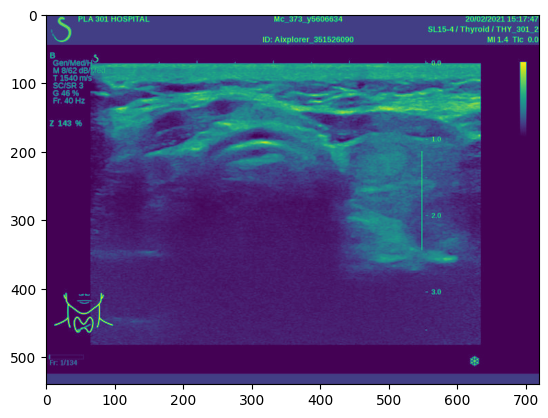

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

fp = '/media/eton/hdd931g/42-workspace4debian/10-ExtSrcs/ITKPOCUS/itkpocus/tests/data/83CasesFirstImg/thyroidNodules_axp-042_frm-0001.png'
imageBgr=cv2.imread(fp)
gray_image = cv2.cvtColor(imageBgr, cv2.COLOR_BGR2GRAY)
print(type(img))
plt.imshow(gray_image)

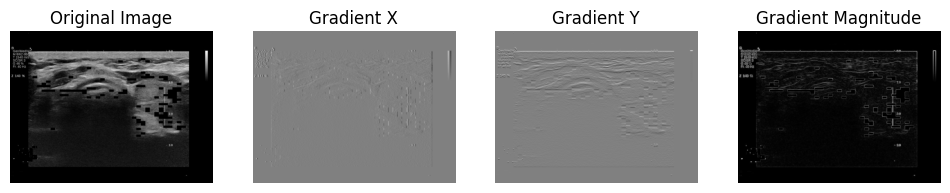

In [26]:
def drawImgGradient(imageBgr):
    # Load the image in grayscale
    gray_image = cv2.cvtColor(imageBgr, cv2.COLOR_BGR2GRAY)
    # Compute the gradient in the x direction
    grad_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    
    # Compute the gradient in the y direction
    grad_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Compute the gradient magnitude
    grad_magnitude = cv2.magnitude(grad_x, grad_y)
    
    # Compute the gradient direction
    grad_direction = cv2.phase(grad_x, grad_y, angleInDegrees=True)
    
    # Display the results
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 4, 1)
    plt.title('Original Image')
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 4, 2)
    plt.title('Gradient X')
    plt.imshow(grad_x, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 4, 3)
    plt.title('Gradient Y')
    plt.imshow(grad_y, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 4, 4)
    plt.title('Gradient Magnitude')
    plt.imshow(grad_magnitude, cmap='gray')
    plt.axis('off')
    
    plt.show()

drawImgGradient(img)

grad_phase (540, 720), [[ 91.5478363  122.46551514 247.61547852 331.11416626]
 [149.03993225 116.56710815 100.30475616  44.99045563]
 [104.53624725  82.40605927  78.68979645 109.98734283]]
topRow=64, Bottom=488
leftCol=63, rightCol=640


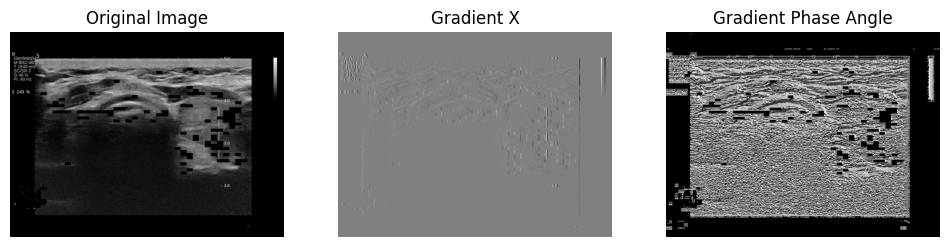

In [45]:
def drawImgGradientgrad_phase(imageBgr):
    # Load the image in grayscale
    gray_image = cv2.cvtColor(imageBgr, cv2.COLOR_BGR2GRAY)
    # Compute the gradient in the x direction
    grad_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    
    # Compute the gradient in the y direction
    grad_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Compute the gradient magnitude
    grad_magnitude = cv2.magnitude(grad_x, grad_y)
    
    # Compute the gradient direction

    # Compute the phase angle of the gradient vectors
    grad_phase = cv2.phase(grad_x, grad_y, angleInDegrees=True)
    print(f"grad_phase {grad_phase.shape}, {grad_phase[220:223,220:224]}")
    
    topRow=-1
    bottomRow=-1
    
    for irow in range(grad_phase.shape[0]):
        irowval=grad_magnitude[irow, :]
        nonZeroCnt=np.sum(irowval>0)
        if nonZeroCnt > 200:
            #print(f"row[{irow}]: has non zero item is: {nonZeroCnt}")
            if topRow<0:
                topRow=irow
            else:
                bottomRow=irow
    print(f"topRow={topRow}, Bottom={bottomRow}")

    leftCol=-1
    rightCol=-1
    for icol in range(grad_phase.shape[1]):
        icolval=grad_magnitude[:,icol]
        nonZeroCnt=np.sum(icolval>0)
        if nonZeroCnt > 200:
            #print(f"col[{icol}]: has non zero item is: {nonZeroCnt}")
            if leftCol<0:
                leftCol=icol
            else:
                    rightCol=icol
    print(f"leftCol={leftCol}, rightCol={rightCol}")
    
    # Display the results
    plt.figure(figsize=(12, 6))
    
    plt.subplot(1, 3, 1)
    plt.title('Original Image')
    plt.imshow(gray_image, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 2)
    plt.title('Gradient X')
    plt.imshow(grad_x, cmap='gray')
    plt.axis('off')
    
    plt.subplot(1, 3, 3)
    plt.title('Gradient Phase Angle')
    plt.imshow(grad_phase,cmap='gray')#cmap='hsv'
    plt.axis('off')
    
    plt.show()
    return [topRow, bottomRow, leftCol,rightCol]

roiInfo=drawImgGradientgrad_phase(img)

gradx shape=(540, 720)


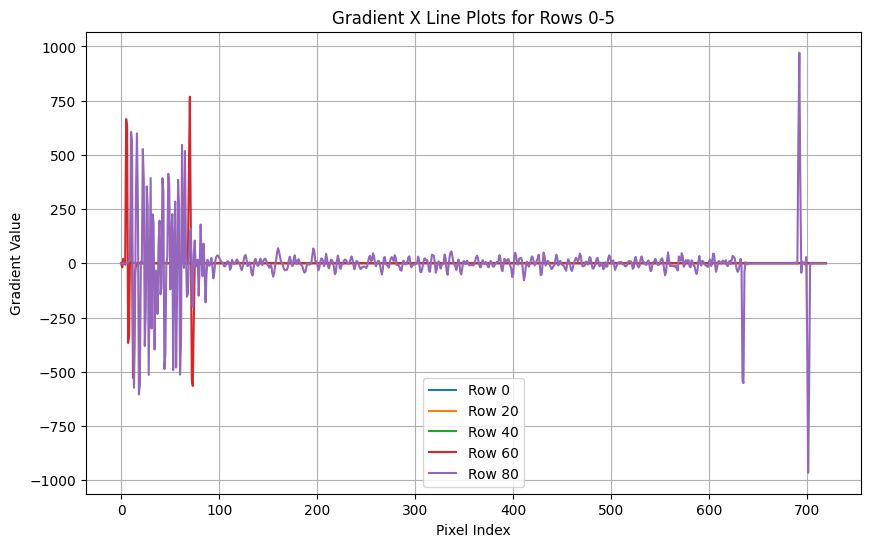

In [23]:
def showimgGradient(img):
    # Compute the gradient in the x direction
    grad_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
    
    # Extract a line of pixel values from the gradient image
    # For example, extract the middle row
    middle_row_index = img.shape[0] // 2
    grad_x_line = grad_x[middle_row_index, :]
    
    # Plot the gradient line
    plt.figure(figsize=(10, 4))
    plt.plot(grad_x_line, label='Gradient X')
    plt.title('Gradient X Line Plot')
    plt.xlabel('Pixel Index')
    plt.ylabel('Gradient Value')
    plt.legend()
    plt.grid(True)
    plt.show()

def showGradient5Line(image):
    # Compute the gradient in the x direction
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    grad_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    # Compute the gradient in the y direction
    grad_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    print(f"gradx shape={grad_x.shape}")
    # Extract the gradient values for rows 0 to 5
    rows_to_plot = range(0, 100, 20)  # Rows 0 to 5
    grad_x_lines = [grad_x[i, :] for i in rows_to_plot]
    
    # Plot the gradient lines
    plt.figure(figsize=(10, 6))
    for i, grad_x_line in enumerate(grad_x_lines):
        plt.plot(grad_x_line, label=f'Row {rows_to_plot[i]}')
    
    plt.title('Gradient X Line Plots for Rows 0-5')
    plt.xlabel('Pixel Index')
    plt.ylabel('Gradient Value')
    plt.legend()
    plt.grid(True)
    plt.show()


#showimgGradient(img)
showGradient5Line(img)

grad_magnitude (540, 720), [[21.21320344 20.         19.23538406 21.02379604 28.63564213]
 [ 0.          3.16227766  4.24264069 10.29563014 20.88061302]
 [28.28427125 31.144823   30.         31.2409987  23.19482701]
 [15.23154621 14.56021978 15.03329638 34.40930107 39.62322551]]
topRow=71, Bottom=484
leftCol=63, rightCol=638
debug: cropInfo=[71, 484, 63, 638], image shape=(540, 720)
debug:cropped_image.shape=(413, 575)


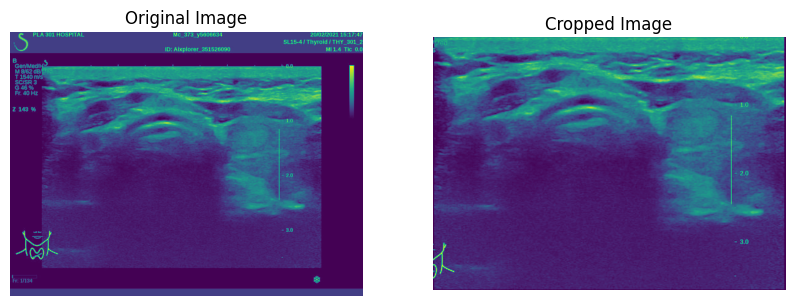

In [93]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def getUSimgRectByGradientPhase(gray_image): 
    # Load the image in grayscale

    # Compute the gradient in the x direction
    grad_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, ksize=3)
    
    # Compute the gradient in the y direction
    grad_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, ksize=3)
    
    # Compute the gradient magnitude
    grad_magnitude = cv2.magnitude(grad_x, grad_y)
    print(f"grad_magnitude {grad_magnitude.shape}, {grad_magnitude[300:304,300:305]}")
    # Compute the phase angle of the gradient vectors
    grad_phase = cv2.phase(grad_x, grad_y, angleInDegrees=True)
    grad_phase[grad_phase==90]=0
    grad_phase[grad_phase==180]=0
    grad_phase[grad_phase==270]=0
    #print(f"grad_phase {grad_phase.shape}, {grad_phase[3:4,0:229]}")
    
    topRow=-1
    bottomRow=-1

    rowCnt=grad_phase.shape[0]
    colCnt=grad_phase.shape[1]
    for irow in range(rowCnt):
        irowval=grad_phase[irow, :]
        #print(f"debug:irowval={irowval}") if irow ==-1 else None
        nonZeroCnt=np.sum(irowval>1)
        if nonZeroCnt > colCnt*0.6:
            #print(f"debug:row[{irow}]: has non zero item is: {nonZeroCnt}")
            if topRow<3:
                topRow=irow
            else:
                bottomRow=irow
    print(f"topRow={topRow}, Bottom={bottomRow}")

    leftCol=-1
    rightCol=-1
    for icol in range(colCnt):
        icolval=grad_phase[:,icol]
        nonZeroCnt=np.sum(icolval>0)
        if nonZeroCnt > rowCnt*0.61:
            #print(f"debug: col[{icol}]: has non zero item is: {nonZeroCnt}")
            if leftCol<0:
                leftCol=icol
            else:
                rightCol=icol
    print(f"leftCol={leftCol}, rightCol={rightCol}")

    return [topRow, bottomRow, leftCol,rightCol]


def showCropedImg(image, cropInfo):
    print(f"debug: cropInfo={cropInfo}, image shape={image.shape}")
    x_start, x_end, y_start,  y_end = cropInfo
    # Crop the image
    cropped_image = image[x_start:x_end, y_start:y_end]
    print(f"debug:cropped_image.shape={cropped_image.shape}")
    # Convert the cropped image from BGR to RGB (for displaying with matplotlib)
    
    # Display the original and cropped images
    plt.figure(figsize=(10, 5))
    
    plt.subplot(1, 2, 1)
    plt.title('Original Image')
    plt.imshow(image)
    plt.axis('off')
    
    plt.subplot(1, 2, 2)
    plt.title('Cropped Image')
    plt.imshow(cropped_image)
    plt.axis('off')


def cropImage(fp:str):
    imageBgr=cv2.imread(fp)
    gray_image = cv2.cvtColor(imageBgr, cv2.COLOR_BGR2GRAY)

    roiInfo=getUSimgRectByGradientPhase(gray_image)
    showCropedImg(gray_image, roiInfo)

fp = '/media/eton/hdd931g/42-workspace4debian/10-ExtSrcs/ITKPOCUS/itkpocus/tests/data/83CasesFirstImg/thyroidNodules_axp-042_frm-0001.png'

cropImage(fp)

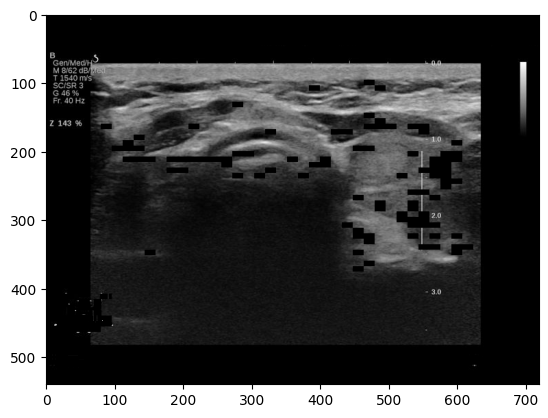

In [11]:
def removeAllNonGrayscalePixels(img:np.ndarray):
    # Convert the image to grayscale
    gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    
    # Create a mask where the grayscale image is equal to the original image
    mask = np.all(img == gray_image[:, :, np.newaxis], axis=-1)
    
    # Set non-grayscale pixels to zero
    img[~mask] = 0
    plt.imshow(img)

removeAllNonGrayscalePixels(img)


In [33]:
array = np.array([[1, -2, 3], [4, 0, -5], [6, 7, -8], [9, -10, 11]])
print(array)


print(array>0)

[[  1  -2   3]
 [  4   0  -5]
 [  6   7  -8]
 [  9 -10  11]]
[[ True False  True]
 [ True False False]
 [ True  True False]
 [ True False  True]]
